In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  N = data.shape[0]
  features_X = np.c_[np.ones((N, 1)), features_X]


  return features_X, sales_Y


In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  # **************** your code here ****************
    individual = [generate_random_value() for i in range(n)]  

    return individual

In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    # **************** your code here ****************
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)

    return fitness

In [7]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


   # **************** your code here ****************

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [9]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    # **************** your code here ****************
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [11]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [13]:
random.seed(0) # please do not remove this line

In [14]:
population = initializePopulation(100)
print(len(population))

100


In [15]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [16]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[1.8629652223966464, 2.419538566814291, 1.69007579945888, -4.9357654630185435]


In [17]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        ind1 = selection(sorted_population, m)
        ind2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        ind1_new, ind2_new = crossover(ind1, ind2)

        # mutation
        ind1_mutate = mutate(ind1_new)
        ind2_mutate = mutate(ind2_new)
        # **************** your code here ****************
        new_population.append(ind1_mutate)
        new_population.append(ind2_mutate)
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        # **************** your code here ****************
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [18]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [19]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here *************
    population, loss = create_new_population(population, 2, i)
    losses_list.append(loss)
  return losses_list, population


In [20]:
losses_list = run_GA()

Best loss: 2326.1764485526114 with chromsome:  [0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]
Best loss: 1253.8919624686107 with chromsome:  [-1.1031614785319588, 0.11745789662260253, -0.028887027707122925, -0.9328709307816119]
Best loss: 510.9145729658996 with chromsome:  [4.947020060955988, 0.21439632008350418, -0.7615486792456028, 0.3190190964552775]
Best loss: 496.73033360057116 with chromsome:  [1.4296876569411754, 0.1264912163847609, -1.1985060912434131, 0.372021501216685]
Best loss: 496.73033360057116 with chromsome:  [1.4296876569411754, 0.1264912163847609, -1.1985060912434131, 0.372021501216685]
Best loss: 137.60756994469193 with chromsome:  [3.908563270380575, 0.11745789662260253, 0.46740417616252916, -0.5036086147165564]
Best loss: 80.68518813143064 with chromsome:  [-0.8378228355620487, 0.09294055512451882, 0.5391677572057207, -0.36137905086295996]
Best loss: 80.68518813143064 with chromsome:  [-0.8378228355620487, 0.09294055512451882, 

In [21]:
# losses_list = run_GA()

Best loss: 1586.9662771862768 with chromsome:  [-3.478551719579107, 0.3983282832146362, -0.2079143130946859, -1.2228904872909618]
Best loss: 1154.5600411586795 with chromsome:  [-1.264217331114288, 0.19918720777966414, 0.14162073288212618, -1.1758212938013657]
Best loss: 1154.5600411586795 with chromsome:  [-1.264217331114288, 0.19918720777966414, 0.14162073288212618, -1.1758212938013657]
Best loss: 146.4342818620763 with chromsome:  [3.5081179322275933, -0.05269452860028889, 0.521364773375862, 0.14126185483184783]
Best loss: 146.4342818620763 with chromsome:  [3.5081179322275933, -0.05269452860028889, 0.521364773375862, 0.14126185483184783]
Best loss: 146.4342818620763 with chromsome:  [3.5081179322275933, -0.05269452860028889, 0.521364773375862, 0.14126185483184783]
Best loss: 143.15035510310082 with chromsome:  [4.1369432367111365, -0.05269452860028889, 0.521364773375862, 0.14126185483184783]
Best loss: 143.15035510310082 with chromsome:  [4.1369432367111365, -0.05269452860028889, 0

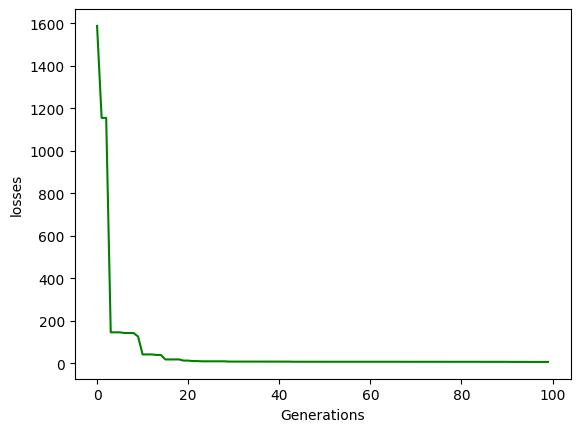

In [22]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      # *********** your code here *************
      plt.plot(losses_list, c='green')
      plt.xlabel('Generations')
      plt.ylabel('losses')
      plt.show()
losses_list, population = run_GA()
visualize_loss(losses_list)

[1.1061967024120978, 0.07897558651668746, 0.08271200695312508, 0.010471673339002008]


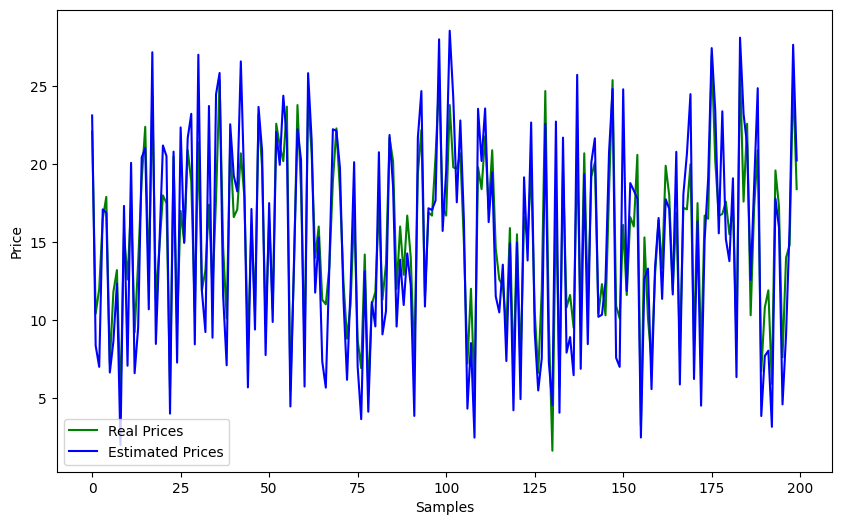

In [24]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
     estimated_price = sum(c*x for x, c in zip(feature, theta))
     estimated_prices.append(estimated_price)
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[1.1061967024120978, 0.07897558651668746, 0.08271200695312508, 0.010471673339002008]


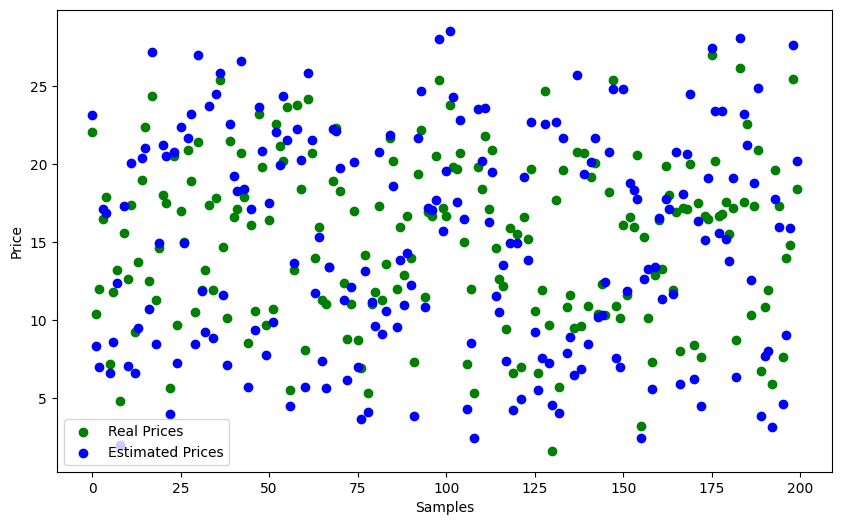

In [25]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()